In [1]:
# Download data, execute this block once in a while
# checks if dataset is downloaded at data/covid19-severity-prediction
# updating to the latest version
# Note: this can take a while if you don't have the dataset in data/covid19-severity-prediction

from utils import *

updating to the latest version
update successful
current working dir: d:\dataset\CS184A-Covid19_severity_prediction


In [2]:
import load_data
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [3]:
df = load_data.load_county_level('./data/covid19-severity-prediction/data')

loading county-level data...
loaded and merged COVID-19 cases/deaths data successfully


In [13]:
df.columns.to_list()

['countyFIPS',
 'STATEFP',
 'COUNTYFP',
 'CountyName',
 'StateName',
 'State',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'CensusRegionName',
 'CensusDivisionName',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',


In [6]:
len(df.columns.to_list())

683

In [7]:
df.count()

countyFIPS         3142
STATEFP            3142
COUNTYFP           3142
CountyName         3142
StateName          3142
                   ... 
cases              3142
tot_deaths         3142
tot_cases          3142
neighbor_deaths    3142
neighbor_cases     3142
Length: 683, dtype: int64

In [9]:
df.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,#Deaths_11-08-2020,#Deaths_11-09-2020,#Deaths_11-10-2020,#Deaths_11-11-2020,deaths,cases,tot_deaths,tot_cases,neighbor_deaths,neighbor_cases
1843,36047,36.0,47.0,Kings,NY,New York,40.640578,-73.954654,40.650523,-73.954811,...,7434,7436,7440,7441,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7441,79558,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1860,36081,36.0,81.0,Queens,NY,New York,40.683532,-73.814712,40.721294,-73.833451,...,7303,7307,7310,7317,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7317,80555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
199,06037,6.0,37.0,Los Angeles,CA,California,34.369957,-118.212742,34.065193,-118.244222,...,7172,7177,7200,7216,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7216,327964,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, ..."
602,17031,17.0,31.0,Cook,IL,Illinois,41.842959,-87.821180,41.865937,-87.757714,...,5639,5645,5667,5717,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...",5717,231462,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1822,36005,36.0,5.0,Bronx,NY,New York,40.856182,-73.864945,40.849354,-73.882363,...,5010,5010,5010,5014,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5014,57657,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
df[['CountyName', 'StateName', '#Cases_01-22-2020', '#Cases_05-04-2020', '#Hospitals', '#ICU_beds']]

,CountyName,StateName,#Cases_01-22-2020,#Cases_05-04-2020,#Hospitals,#ICU_beds
1843,Kings,NY,0,47183,12.0,318.0
1860,Queens,NY,0,54090,6.0,129.0
199,Los Angeles,CA,0,26217,76.0,2126.0
602,Cook,IL,0,43715,46.0,1606.0
1822,Bronx,NY,0,39223,6.0,270.0
...,...,...,...,...,...,...
921,Hodgeman,KS,0,0,1.0,0.0
1683,Grant,NE,0,0,0.0,0.0
2411,Stanley,SD,0,8,0.0,0.0
2406,Potter,SD,0,0,1.0,0.0


In [22]:
df[['CountyName', 'StateName', '#Cases_01-22-2020', '#Cases_03-22-2020', '#Cases_05-04-2020', '#Cases_11-04-2020', '#Hospitals', '#ICU_beds']][df['CountyName']=='Orange'][df['StateName']=='CA']

,CountyName,StateName,#Cases_01-22-2020,#Cases_03-22-2020,#Cases_05-04-2020,#Cases_11-04-2020,#Hospitals,#ICU_beds
210,Orange,CA,0,95,2819,60841,24.0,651.0


In [24]:
df[['CountyName', 'StateName', '#Hospitals', '#ICU_beds']]

,CountyName,StateName,#Hospitals,#ICU_beds
1843,Kings,NY,12.0,318.0
1860,Queens,NY,6.0,129.0
199,Los Angeles,CA,76.0,2126.0
602,Cook,IL,46.0,1606.0
1822,Bronx,NY,6.0,270.0
...,...,...,...,...
921,Hodgeman,KS,1.0,0.0
1683,Grant,NE,0.0,0.0
2411,Stanley,SD,0.0,0.0
2406,Potter,SD,1.0,0.0


[]

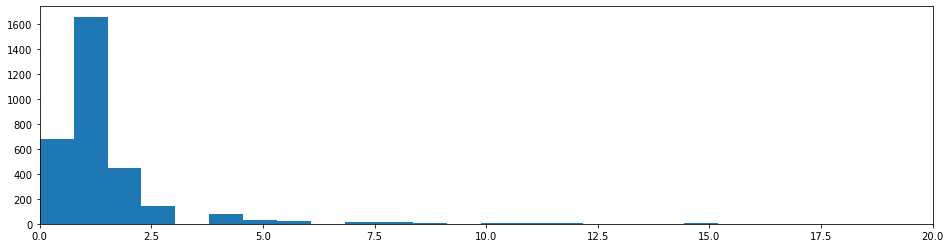

In [32]:
hospitals=(sorted(df['#Hospitals'].to_list()))

plt.figure(figsize=(16,4))
plt.hist(hospitals, bins=100)
plt.xlim((0, 20))
plt.plot()

In [81]:
hosp_pop = df[['PopulationEstimate2018','#Hospitals']]
hosp_pop = np.array(hosp_pop)

In [82]:
def to_numpy(x):
    """Convert a PyTorch tensor to NumPy."""
    return x.squeeze().detach().cpu().numpy()

def to_torch(x, device='cpu'):
    return torch.tensor(x).unsqueeze(-1).to(device).float()

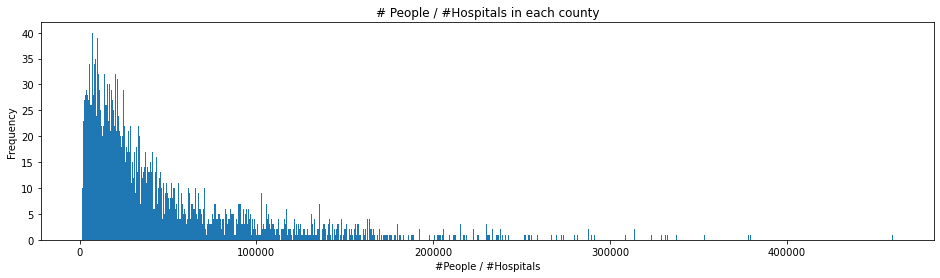

In [84]:
popperhosp = hosp_pop[:,0] / hosp_pop[:,1]
popperhosp[popperhosp==float('+inf')] = float('nan')

plt.figure(figsize=(16,4))
plt.title('# People / #Hospitals in each county')
plt.xlabel("#People / #Hospitals")
plt.ylabel("Frequency")
# plt.xscale('log')
plt.hist(popperhosp, bins=800)
plt.show()

In [91]:
def plotCounty(countyname, statename, plot=True):
    device='cuda'
    orange = df[(df['StateName'] == statename) & (df['CountyName'] == countyname)]
    x = form_input_tensor(orange, [
    '#Hospitals', 
    '#ICU_beds', 
    'MedicareEnrollment,AgedTot2017', 
    'DiabetesPercentage', 
    'HeartDiseaseMortality',
    'StrokeMortality',
    'Smokers_Percentage',
    'RespMortalityRate2014',
    '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017'], maxload=float('+inf')).to(device)
    for i in range(x.shape[1] - 1, 0, -1):
        x[:,i,-2] -= x[:,i-1,-2]
        x[:,i,-1] -= x[:,i-1,-1]
    truey = x[:, :, -2:]

    truey = to_numpy(truey)
    if plot:
        
        plt.figure(figsize=(16,4))
        plt.title(f"{countyname}, {statename}")
        plt.xlabel("day")
        plt.ylabel("count")
        # plt.ylim((0, 70000))
        plt.plot(range(len(truey)),truey[:,0],'r-', label='case increase')
        plt.plot(range(len(truey)),truey[:,1],'b-', label='death increase')
        plt.legend()
        # plt.plot(range(len(truey)),yhat[:,0],'g-')
        # plt.plot(range(len(truey)), np.absolute(truey[:,0]-yhat[:,0]), 'b-')
        plt.show()

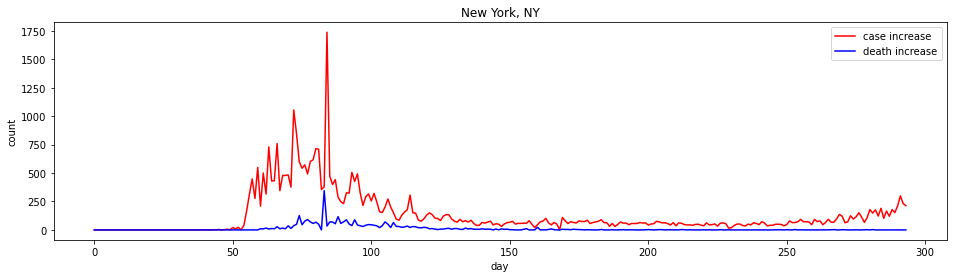

In [94]:
plotCounty("New York", "NY")

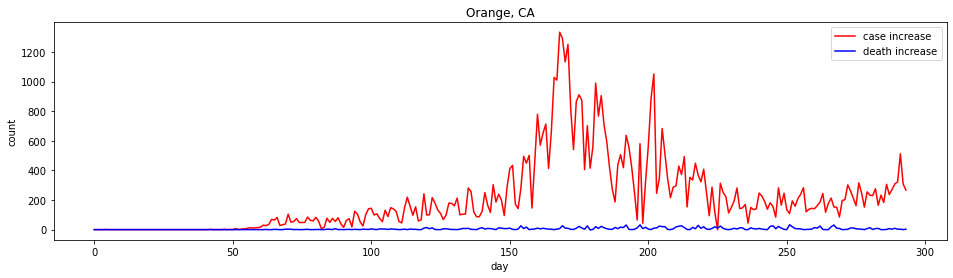

In [93]:
plotCounty("Orange", "CA")